In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


X, y= make_moons(n_samples=500, noise=0.2, random_state=132)
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=132)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#Hard Voting

log_clf= LogisticRegression(solver='liblinear', random_state=132)
rf_clf= RandomForestClassifier(n_estimators=10, random_state=132)
svm_clf= SVC(gamma='auto', random_state=132)

In [3]:
voting_clf= VotingClassifier(estimators=[('lr', log_clf), ('rf', rf_clf), ('svm', svm_clf)], voting='hard')

In [4]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=132, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFo...',
  max_iter=-1, probability=False, random_state=132, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [5]:
for clf in (log_clf, rf_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.808
RandomForestClassifier 0.944
SVC 0.952
VotingClassifier 0.936


c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [6]:
#soft voting

log_clf= LogisticRegression(solver='liblinear', random_state=132)
rf_clf= RandomForestClassifier(n_estimators=10, random_state=132)
svm_clf= SVC(gamma='auto', probability=True, random_state=132)
voting_clf= VotingClassifier(estimators=[('lr', log_clf), ('rf', rf_clf), ('svm', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rf_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.808
RandomForestClassifier 0.944
SVC 0.952
VotingClassifier 0.944


c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [7]:
#Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf= BaggingClassifier(DecisionTreeClassifier(random_state=23), n_estimators=500,
                          max_samples=100, bootstrap=True, n_jobs=-1, random_state=23)
bag_clf.fit(X_train, y_train)
y_pred=bag_clf.predict(X_test)

In [8]:
accuracy_score(y_test, y_pred)

0.952

In [9]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.944


In [10]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel("x_1")
    plt.ylabel("x_2")

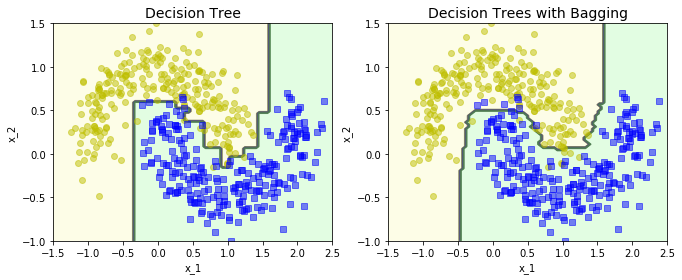

In [11]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

In [12]:
#Random Forest

bag_clf= BaggingClassifier(DecisionTreeClassifier(splitter='random', max_leaf_nodes=16, random_state=132),
                          n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=132)

bag_clf.fit(X_train, y_train)
y_pred= bag_clf.predict(X_test)

In [13]:
rnd_clf= RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=132)
rnd_clf.fit(X_train, y_train)

y_pred_rnd=rnd_clf.predict(X_test)

In [14]:
np.sum(y_pred==y_pred_rnd)/len(y_pred)

0.992

In [15]:
from sklearn.datasets import load_iris

iris= load_iris()

rnd_clf= RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=132)
rnd_clf.fit(iris['data'], iris['target'])

for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name," ", score)

sepal length (cm)   0.09272826254511286
sepal width (cm)   0.02530975261908536
petal length (cm)   0.43694300584840134
petal width (cm)   0.44501897898739956


In [16]:
rnd_clf.feature_importances_

array([0.09272826, 0.02530975, 0.43694301, 0.44501898])

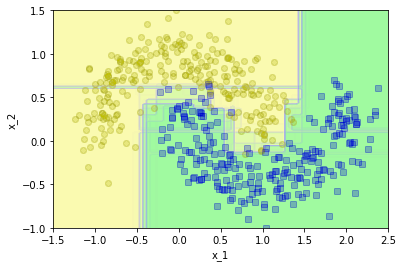

In [17]:
plt.figure(figsize=(6,4))

for i in range(15):
    tree_clf= DecisionTreeClassifier(max_leaf_nodes=16, random_state=32+i)
    indices_with_replacement= np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf, X, y, axes=[-1.5, 2.5, -1., 1.5], alpha=0.02, contour=False)
    
plt.show()

In [18]:
# Out-of-Bag Evaluation

bag_clf= BaggingClassifier(DecisionTreeClassifier(random_state=123), n_estimators=500, 
                           bootstrap=True, n_jobs=-1, oob_score=True, random_state=132)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9733333333333334

In [19]:
bag_clf.oob_decision_function_

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.015625  , 0.984375  ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.2254902 , 0.7745098 ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.96571429, 0.03428571],
       [1.        , 0.        ],
       [0.98757764, 0.01242236],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.04519774, 0.95480226],
       [0.        , 1.        ],
       [0.87777778, 0.12222222],
       [0.

In [20]:
y_pred= bag_clf.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.952

In [22]:
rnd_clf= RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred=rnd_clf.predict(X_test)
y_pred=rnd_clf.predict(X_test)

In [23]:
bag_clf= BaggingClassifier(DecisionTreeClassifier(random_state=12, splitter='random', max_leaf_nodes=16),
                          n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)
y_pred= bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.96

In [24]:
#Feature Importance

from sklearn.datasets import fetch_mldata

mnist= fetch_mldata('MNIST original')

In [25]:
rnd_clf= RandomForestClassifier(n_estimators=500, random_state=123)
rnd_clf.fit(mnist['data'], mnist['target'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [26]:
import matplotlib as mpl

def plot_digit(data):
    image= data.reshape(28,28)
    plt.imshow(image, cmap = mpl.cm.hot, interpolation='nearest')
    plt.axis('off')

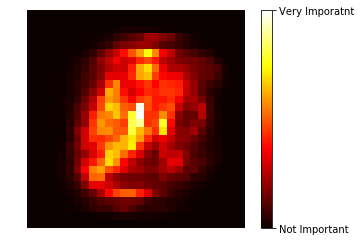

In [27]:
plot_digit(rnd_clf.feature_importances_)
cbar= plt.colorbar(ticks= [rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not Important', 'Very Imporatnt'])
plt.show()

In [28]:
#ADABoost

from sklearn.ensemble import AdaBoostClassifier

ada_clf= AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=500, 
                            algorithm='SAMME.R', learning_rate=0.5, random_state=23)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=500, random_state=23)

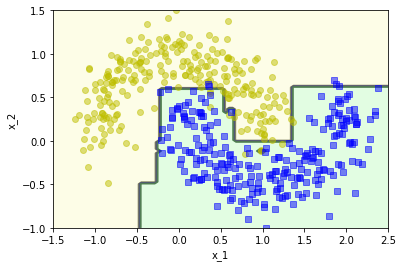

In [29]:
plot_decision_boundary(ada_clf, X, y)

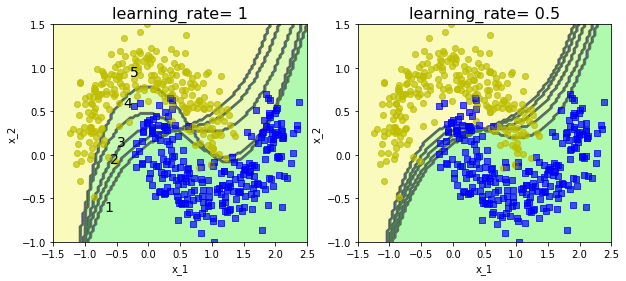

In [30]:
m= len(X_train)

plt.figure(figsize=(10, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights= np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf= SVC(kernel='rbf', C=0.05, gamma='auto', random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred= svm_clf.predict(X_train)
        sample_weights[y_pred!=y_train]*=(1+learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title('learning_rate= {}'.format(learning_rate), fontsize=16)
    if subplot==121:
        plt.text(-0.7, -0.65, '1', fontsize=14)
        plt.text(-0.6, -0.10, '2', fontsize=14)
        plt.text(-0.5, 0.10, '3', fontsize=14)
        plt.text(-0.4, 0.55, '4', fontsize=14)
        plt.text(-0.3, 0.90, '5', fontsize=14)
        
plt.show()

In [31]:
list(m for m in dir(ada_clf) if not m.startswith('_') and m.endswith('_'))

['base_estimator_',
 'classes_',
 'estimator_errors_',
 'estimator_weights_',
 'estimators_',
 'feature_importances_',
 'n_classes_']

In [32]:
ada_clf.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
# Gradient Boosting

np.random.seed(123)
X= np.random.rand(100, 1)-0.5
y= 3*X[:, 0]**2 + 0.05*np.random.randn(100)

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1= DecisionTreeRegressor(max_depth=2, random_state=122)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=122, splitter='best')

In [35]:
y2= y- tree_reg1.predict(X)

tree_reg2= DecisionTreeRegressor(max_depth=2, random_state=124)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=124, splitter='best')

In [36]:
y3= y2- tree_reg2.predict(X)

tree_reg3= DecisionTreeRegressor(max_depth=2, random_state=129)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=129, splitter='best')

In [37]:
X_new= np.array([[0.8]])

print(tree_reg1.predict(X_new))
print(tree_reg2.predict(X_new))
print(tree_reg3.predict(X_new))
sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

[0.69393022]
[1.85037171e-17]
[0.00947581]


array([0.70340603])

Text(0.5,1,'ensemble preds')

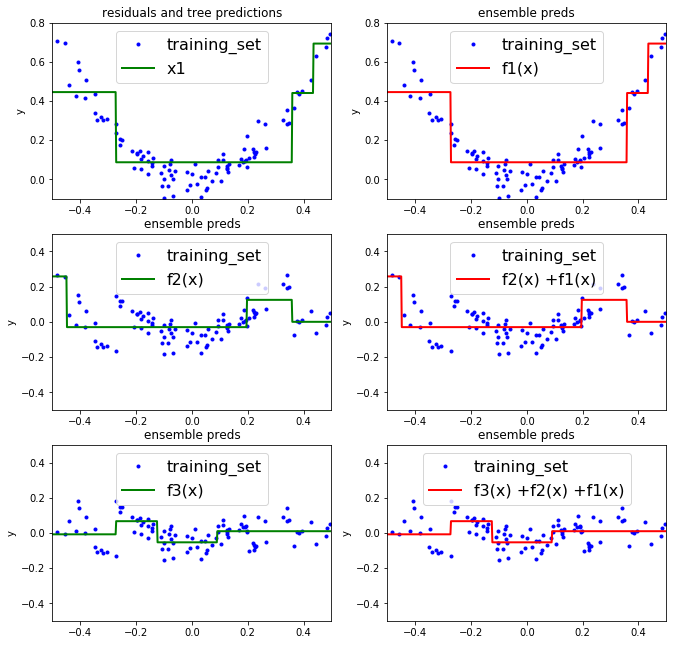

In [38]:
def plot_predictions(regressors, X, y, axes, label=None, style='r-', data_style='b.', data_label=None):
    x1= np.linspace(axes[0], axes[1], 500)
    y_pred= sum(regressor.predict(x1.reshape(-1,1)) for regressor in regressors)
    plt.plot(X[:,0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc='upper center', fontsize=16)
    plt.axis(axes)
    
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, .5, -0.1, 0.8], label='x1', style='g-', data_label='training_set')
plt.ylabel('y')
plt.title('residuals and tree predictions')

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, .5, -0.1, 0.8], label='f1(x)', data_label='training_set')
plt.ylabel('y')
plt.title('ensemble preds')

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, .5, -0.5, 0.5], label='f2(x)', style='g-', data_label='training_set')
plt.ylabel('y')
plt.title('ensemble preds')

plt.subplot(324)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, .5, -0.5, 0.5], label='f2(x) +f1(x)', data_label='training_set')
plt.ylabel('y')
plt.title('ensemble preds')

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, .5, -0.5, 0.5], label='f3(x)', style='g-', data_label='training_set')
plt.ylabel('y')
plt.title('ensemble preds')

plt.subplot(326)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, .5, -0.5, 0.5], label='f3(x) +f2(x) +f1(x)',  data_label='training_set')
plt.ylabel('y')
plt.title('ensemble preds')


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt= GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.5, random_state=123)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.5, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=123,
             subsample=1.0, verbose=0, warm_start=False)

In [40]:
gbrt_slow= GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.01, random_state=123)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=123,
             subsample=1.0, verbose=0, warm_start=False)

Text(0.5,1,'lr=0.01, estimators=200')

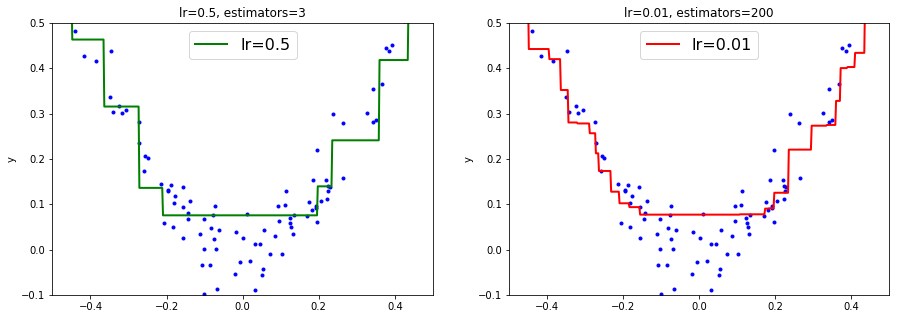

In [41]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, .5, -0.1, 0.5], label='lr=0.5', style='g-', )
plt.ylabel('y')
plt.title('lr={}, estimators={}'.format(gbrt.learning_rate, gbrt.n_estimators))

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, .5, -0.1, 0.5], label='lr=0.01')
plt.ylabel('y')
plt.title('lr={}, estimators={}'.format(gbrt_slow.learning_rate, gbrt_slow.n_estimators))

In [42]:
gbrt.predict(X)

array([0.13944474, 0.13602924, 0.31558052, 0.07544205, 0.13944474,
       0.07544205, 0.61137029, 0.07544205, 0.07544205, 0.07544205,
       0.07544205, 0.13944474, 0.07544205, 0.46346298, 0.07544205,
       0.24104406, 0.31558052, 0.31558052, 0.07544205, 0.07544205,
       0.07544205, 0.24104406, 0.13944474, 0.07544205, 0.13944474,
       0.07544205, 0.07544205, 0.13602924, 0.07544205, 0.07544205,
       0.46346298, 0.07544205, 0.07544205, 0.07544205, 0.07544205,
       0.07544205, 0.07544205, 0.41825283, 0.54475398, 0.07544205,
       0.07544205, 0.46346298, 0.07544205, 0.07544205, 0.41825283,
       0.13602924, 0.07544205, 0.61137029, 0.07544205, 0.07544205,
       0.46346298, 0.24104406, 0.07544205, 0.07544205, 0.07544205,
       0.07544205, 0.07544205, 0.07544205, 0.41825283, 0.07544205,
       0.07544205, 0.07544205, 0.07544205, 0.07544205, 0.24104406,
       0.46346298, 0.24104406, 0.13602924, 0.31558052, 0.07544205,
       0.46346298, 0.41825283, 0.07544205, 0.13944474, 0.56780

In [43]:
#Early Stopping

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [44]:
X_train, X_test, y_train, y_test= train_test_split(X, y)

gbrt= GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=132)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, presort='auto', random_state=132,
             subsample=1.0, verbose=0, warm_start=False)

In [45]:
errors= [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]
best_n_estimators= np.argmin(errors)+1
min_error= np.min(errors)

In [46]:
gbrt_best= GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators, random_state=154)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=30, presort='auto', random_state=154,
             subsample=1.0, verbose=0, warm_start=False)

Text(0.5,1,'Best model (30 trees)')

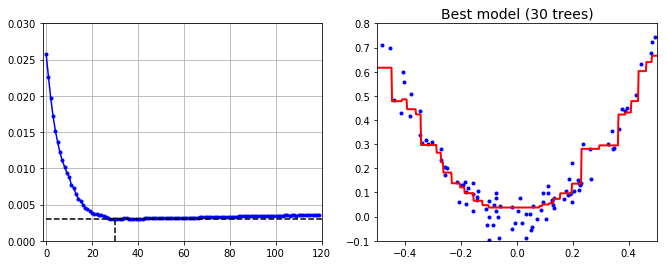

In [47]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, 'b.-')
plt.plot([best_n_estimators, best_n_estimators], [0, min_error], 'k--')
plt.plot([0, 120], [min_error, min_error], 'k--')
plt.grid()
plt.axis([-1.5, 120, 0.0,0.03 ])

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % best_n_estimators, fontsize=14)

In [50]:
gbrt= GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=12)

min_val_error= float('inf')
error_going_up= 0
for n_estimators in range(1, 100):
    gbrt.n_estimators= n_estimators
    gbrt.fit(X_train, y_train)
    y_pred= gbrt.predict(X_test)
    val_error= mean_squared_error(y_test, y_pred)
    if val_error<min_val_error:
        min_val_error=val_error
        error_going_up=0
    else:
        error_going_up+=1
        if error_going_up==5:
            break

In [52]:
print(gbrt.n_estimators)
print("Min Val Error: ", min_val_error)

35
Min Val Error:  0.003005760700264422


In [55]:
import xgboost

xgb_reg= xgboost.XGBRegressor(random_state=123)
xgb_reg.fit(X_train, y_train)
y_pred= xgb_reg.predict(X_test)
val_error= mean_squared_error(y_test, y_pred)
val_error

[14:16:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.0036262005573619973

In [59]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=3)
y_pred= xgb_reg.predict(X_test)
val_error= mean_squared_error(y_test, y_pred)
val_error

[14:19:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.36814
Will train until validation_0-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:0.333515
[2]	validation_0-rmse:0.302441
[3]	validation_0-rmse:0.274829
[4]	validation_0-rmse:0.250339
[5]	validation_0-rmse:0.227648
[6]	validation_0-rmse:0.207961
[7]	validation_0-rmse:0.189895
[8]	validation_0-rmse:0.174261
[9]	validation_0-rmse:0.159673
[10]	validation_0-rmse:0.147202
[11]	validation_0-rmse:0.135594
[12]	validation_0-rmse:0.124927
[13]	validation_0-rmse:0.115766
[14]	validation_0-rmse:0.107261
[15]	validation_0-rmse:0.100016
[16]	validation_0-rmse:0.093088
[17]	validation_0-rmse:0.087317
[18]	validation_0-rmse:0.082327
[19]	validation_0-rmse:0.077942
[20]	validation_0-rmse:0.074147
[21]	validation_0-rmse:0.0713
[22]	validation_0-rmse:0.068529
[23]	validation_0-rmse:0.06645
[24]	validation_0-

0.003220882471728656

In [80]:
# Voting Classifier

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

mnsit= fetch_mldata('MNIST original')

X_train_val, X_test, y_train_val, y_test = train_test_split(mnist.data, mnist.target, test_size=10000, random_state=12)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=10000, random_state=12)

In [77]:
rf_clf= RandomForestClassifier(n_estimators=10, random_state=32)
ext_clf= ExtraTreesClassifier(n_estimators=10, random_state=32)
svm_clf= SVC(random_state=32)
mlp_clf= MLPClassifier(random_state=32)

In [78]:
estimators= [rf_clf, ext_clf, svm_clf, mlp_clf]
for estimator in estimators:
    print("Training ", estimator)
    estimator.fit(X_train, y_train)

Training  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=32, verbose=0, warm_start=False)
Training  ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=32, verbose=0, warm_start=False)
Training  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, 

In [79]:
[estimator.score(X_val, y_val) for estimator in estimators]

[0.9482, 0.9485, 0.1168, 0.956]

In [ ]:
names_estimators= [
    ('random forest', rf_clf), 
    ('Extra Trees', ext_clf),
    ('SVM', svm_clf),
    ('MLP', mlp_clf)]

voting_clf= VotingClassifier(names_estimators)
voting_clf.fit(X_train, y_train)

In [ ]:
voting_clf.score(X_val, y_val)

In [ ]:
[estimator.score(X_val, y_val) for estimator in voting_clf.estimators_]